# **📖 Background**

You work for Leeds City Council (UK) as a Data Scientist, and your colleague asked you to help her draft a proposal for getting more businesses to locate stores/branches/outlets in the city centre. 

A weekly report that tracks footfall is usually generated by the department, she would like you to investigate further and give her useful insights. 

# **💾 The data**
You have access to one week footfall data: [source](https://datamillnorth.org/dataset/leeds-city-centre-footfall-data)
- "Location Name" - The name of the street
- "Day Name" - The day of the week
- "Hour" - The time of the day in hours. e.g 13:00, 12:00 etc
- "In Count" - The number of people walking into the city centre
- "Out Count" - The number of people walking out of the city centre
- "Report Count" - The total of people walking in and out of the city centre

# **💪 Challenge**
Help your colleague gain insights:

- What is the average footfall count for the week?
- What is the average footfall count for the week grouped by streets?
- What is the average footfall count for the week grouped by hours
- What is total footbal grouped by day of the week
- What is the correlation between hours and total footfall?
- What is the correlation between day of week and total footfall?
- Any other insights you found during your analysis? List here

In [20]:
# Import the pandas and numpy packages
import pandas as pd  # # data processing, CSV file (e.g. pd.read_csv)
import numpy as np     # linear algebra
import matplotlib.pyplot as plt   # creating interactive visualizations in Python.
import seaborn as sns  # Python data visualization library based on matplotlib
%matplotlib inline 
sns.set() # load seaborn's default theme

# Load the data
footfall = pd.read_csv('/Users/bankolejamgbadi/Documents/data viz/leeds-footfall/Weekly Data 09.01.23 - 15.01.23.csv')

# Create numpy array
footfall_LocationName = footfall['LocationName'].to_numpy()
footfall_DayName = footfall['DayName'].to_numpy()
footfall_Hour = footfall['Hour'].to_numpy()
footfall_InCount = footfall['InCount'].to_numpy()
footfall_OutCount = footfall['OutCount'].to_numpy()
footfall_ReportCount = footfall['ReportCount'].to_numpy()

# Look at the dataframe
footfall.head(5)


,Site,LocationName,BRCYear,BRCMonthName,BRCWeekNum,DayName,Date,Hour,InCount,OutCount,ReportCount,FactoredInCount,FactoredOutCount,FactoredReportCount,LocationGroup
0,Leeds - New,Albion Street at McDonalds,2023,January,2,Monday,09-Jan-23,00:00,58,50,108,58,50,108,No Group
1,Leeds - New,Albion Street at McDonalds,2023,January,2,Monday,09-Jan-23,01:00,23,21,44,23,21,44,No Group
2,Leeds - New,Albion Street at McDonalds,2023,January,2,Monday,09-Jan-23,02:00,26,18,44,26,18,44,No Group
3,Leeds - New,Albion Street at McDonalds,2023,January,2,Monday,09-Jan-23,03:00,20,21,41,20,21,41,No Group
4,Leeds - New,Albion Street at McDonalds,2023,January,2,Monday,09-Jan-23,04:00,16,11,27,16,11,27,No Group


In [5]:
# Look through the report count array

footfall_ReportCount[:20]

array([ 108,   44,   44,   41,   27,   78,  134,  313,  412,  471,  558,
        749, 1026, 1431,  936,  932, 1055, 1012, 1025,  600])

In [7]:
# insight 1. What is the average footfall count for the week?
average_weekly_footfall_count = np.mean(footfall_ReportCount) 
print("The average footfall is:", np.ceil(average_weekly_footfall_count))

The average footfall is: 622.0


In [22]:
# insight 2. What is the average footfall count for the week grouped by streets?
street_average = footfall.groupby('LocationName')['ReportCount'].mean()
print("Average footfall by street:")
np.ceil(street_average)


Average footfall by street:


LocationName
Albion Street South            494.0
Albion Street at McDonalds     567.0
Briggate                       946.0
Briggate at McDonalds          370.0
Commercial Street at Sharps    610.0
Dortmund Square                518.0
Headrow                        920.0
Park Row                       554.0
Name: ReportCount, dtype: float64

In [14]:
# insight 3. What is the average footfall count for the week grouped by hours?
hours_average = footfall.groupby('Hour')['ReportCount'].mean()
print("Average footfall by time of the day:")
np.ceil(hours_average)



Average footfall by time of the day:


Hour
2023-04-11 00:00:00     114.0
2023-04-11 01:00:00      77.0
2023-04-11 02:00:00      62.0
2023-04-11 03:00:00      56.0
2023-04-11 04:00:00      32.0
2023-04-11 05:00:00      41.0
2023-04-11 06:00:00      86.0
2023-04-11 07:00:00     208.0
2023-04-11 08:00:00     458.0
2023-04-11 09:00:00     551.0
2023-04-11 10:00:00     724.0
2023-04-11 11:00:00    1075.0
2023-04-11 12:00:00    1627.0
2023-04-11 13:00:00    1738.0
2023-04-11 14:00:00    1576.0
2023-04-11 15:00:00    1580.0
2023-04-11 16:00:00    1409.0
2023-04-11 17:00:00    1140.0
2023-04-11 18:00:00     825.0
2023-04-11 19:00:00     530.0
2023-04-11 20:00:00     357.0
2023-04-11 21:00:00     255.0
2023-04-11 22:00:00     253.0
2023-04-11 23:00:00     168.0
Name: ReportCount, dtype: float64

In [21]:
# Insight 4. Sum of total footbal grouped by day of the week
footfall_day = footfall.groupby('DayName')['ReportCount'].sum().reset_index()
print('The total footfall by day of the week is : ')
footfall_day


The total footfall by day of the week is : 


,DayName,ReportCount
0,Friday,126008
1,Monday,109230
2,Saturday,169627
3,Sunday,102137
4,Thursday,115106
5,Tuesday,100434
6,Wednesday,113403


In [11]:
# Insight 5a. What is the correlation between hours and total footfall?

# Convert the "Date_Time" column to datetime format
footfall['Hour'] = pd.to_datetime(footfall['Hour'])
# # Extract the hour component from the datetime objects 
hour_col = footfall['Hour'].dt.hour

convert_hour = pd.to_numeric(hour_col)
hours_footfall_correlation = np.corrcoef(convert_hour, footfall_ReportCount)[0,1]
print('The corrrelation between time of the day and total footfall is: ', hours_footfall_correlation)

The corrrelation between time of the day and total footfall is:  0.2986580557338775


The above means that there is a slight tendency for footfall counts to be higher at certain times of the day, but the relationship is not strong.

In [13]:
# Insight 5b. What is the correlation between day of week and total footfall?
# It will return "NAN" i.e no correlation because i am analysing data for just one week

# Create a dictionary to map full weekday names to abbreviated names
weekday_dict = {'Monday': 'Mon', 'Tuesday': 'Tue', 'Wednesday': 'Wed', 'Thursday': 'Thu', 'Friday': 'Fri', 'Saturday': 'Sat', 'Sunday': 'Sun'}

# Convert the 'DayName' column to abbreviated names using the map() method
footfall['DayName'] = footfall['DayName'].map(weekday_dict)

# Convert the ReportCount' column to a numeric data type
footfall['ReportCount'] = pd.to_numeric(footfall['ReportCount'], errors='coerce')


corr_day_footfall = footfall['DayName'].corr(footfall['ReportCount'])
print('Correlation between DayName and ReportCount:', corr_day_footfall)

Correlation between DayName and ReportCount: nan


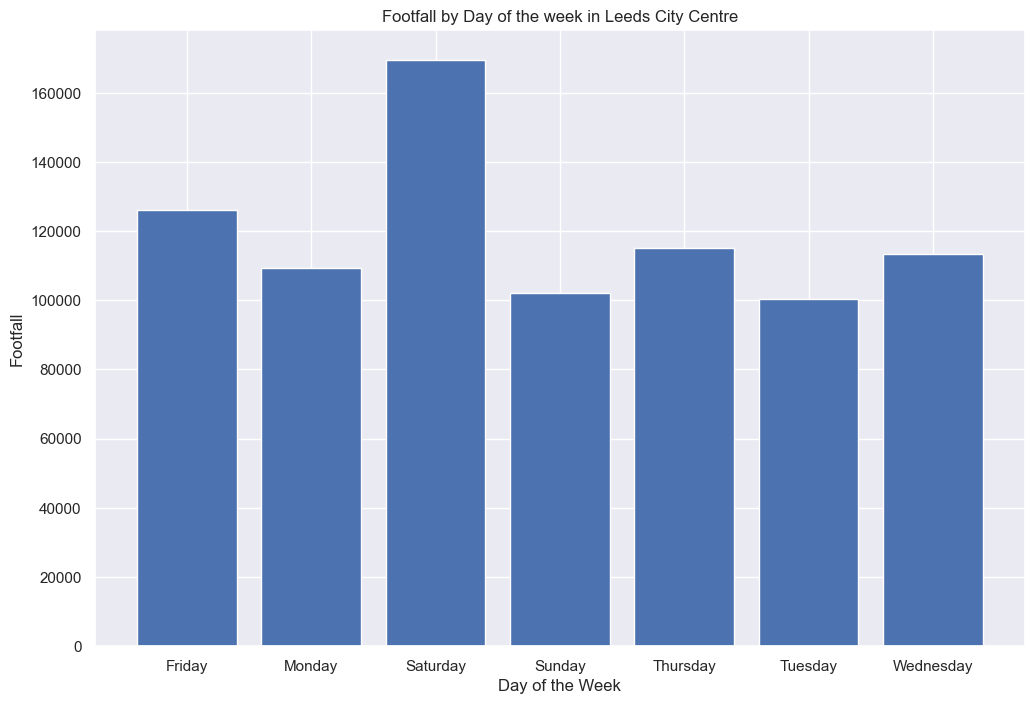

In [ ]:
6 # Create a figure and increase the figure size
fig = plt.figure(figsize=(12,8))

plt.bar(footfall_day['DayName'], footfall_day['ReportCount'])


# Create a title
plt.title('Footfall by Day of the week in Leeds City Centre')
plt.xlabel('Day of the Week')
plt.ylabel('Footfall')

# Show plot
plt.show()
